## Problem Statement

Dengue fever is a mosquito-borne disease. Symptoms are similar to the flu but sometimes it causes a death. In recent years dengue fever has been spreading. Our goal is to predict the total_cases label for each (city, year, weekofyear) in the test set. We will consider two cities - San Juan & Equitos, with test data for each city spanning 5 and 3 years respectively. We will make predictions for both cities. 

Accurate dengue predictions would help public health workers ... and people around the world take steps to reduce the impact of these epidemics. But predicting dengue is a hefty task that calls for the consolidation of different data sets on disease incidence, weather, and the environment.

## Loading and Cleaning Data

First, let us load in our data and do some simple cleaning and prepping =)

In [1]:
import pandas as pd

In [2]:
train_features = pd.read_csv("./dengue_features_train.csv")
test_features = pd.read_csv("./dengue_features_test.csv")
labels = pd.read_csv("./dengue_labels_train.csv")

In [3]:
labels = labels['total_cases']

### Dealing with `NaN` values

we need to get rid of NaN values otherwise our training models will have errors and the code will not execute.

In [4]:
train_features.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [5]:
test_features.isna().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [6]:
train_features.fillna(train_features.mean(), inplace=True)
test_features.fillna(train_features.mean(), inplace=True)

### Converting categorical columns to numerical

As numerical data allows us to perform arithmetic operations on them, further we need to conver categorical data as city to numerical.

In [7]:
# converting categorical columns
# 1 is sj, 0 is iq
def convert_categorical(df):
    df["city"] = df["city"].astype('category')
    cat_columns = df.select_dtypes(['category']).columns
    df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
    return df

train_features = convert_categorical(train_features)
test_features = convert_categorical(test_features)
train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


### Datetime Conversion

As the week_start_date_column is type of 'object', we need to convert it to date format to work with it further. 

In [8]:
# date time preprocessing
from datetime import datetime

def convert_dt(df):
    df['week_start_date'] = pd.to_datetime(df['week_start_date'], \
                                    format='%Y%m%dT', errors='coerce')
    return df

train_features = convert_dt(train_features)
test_features = convert_dt(test_features)

In [9]:
train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [10]:
train_features.dtypes

city                                               int8
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

### Checking for repeating columns & removal and such columns

repeating columns are redundant and may affect our training models and results accordingly. So let's find such columns and drop one of them. 

In [11]:
des_train_features = train_features.describe()
des_test_features = test_features.describe()

In [12]:
import collections

def get_same_col(des_df):
    cols = des_df.columns
    res = {}
    for c in cols:
        if des_df[c]['std'] in res:
            res[des_df[c]['std']].append(c)
        else:
            res[des_df[c]['std']] = [c]

    ans = [v for k,v in res.items() if len(v) > 1][0]
    return ans
train_same_cols = get_same_col(des_train_features)
test_same_cols = get_same_col(des_test_features)

print(train_same_cols)
print(test_same_cols)

['precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm']
['precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm']


In [13]:
# dropping one of the coumn
train_features.drop(train_same_cols[0], axis=1, inplace=True)
test_features.drop(test_same_cols[0], axis=1, inplace=True)

## Analysis

### Total cases against the vegetation index (NDVI)

Looking at the data, there are 4 kinds of columns regarding the vegetation index (NDVI). Let us take a look at how these indices are related to the cases of dengue

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
train_features['total_cases'] = labels

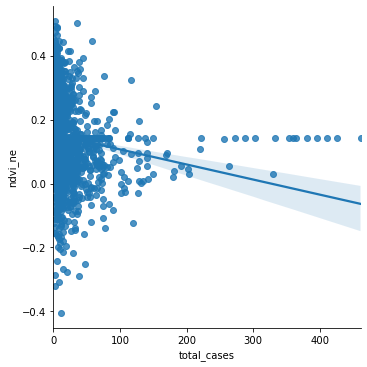

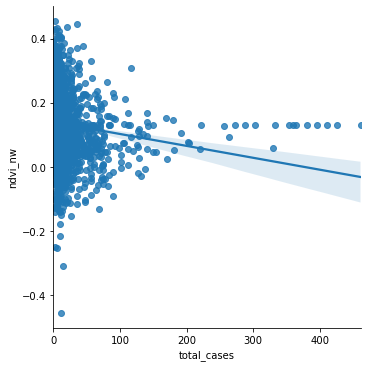

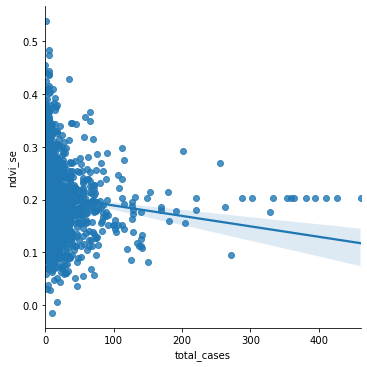

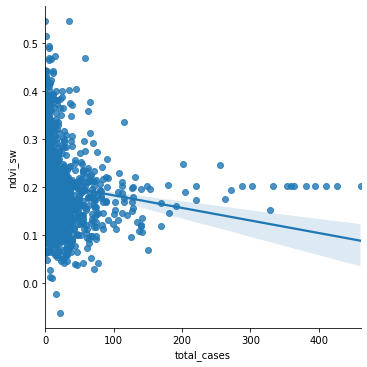

In [16]:
sns.lmplot(x='total_cases', y='ndvi_ne', data=train_features, markers='o')
sns.lmplot(x='total_cases', y='ndvi_nw', data=train_features, markers='o')
sns.lmplot(x='total_cases', y='ndvi_se', data=train_features, markers='o')
sns.lmplot(x='total_cases', y='ndvi_sw', data=train_features, markers='o')

From the plot above, it looks like there exist a slight downward trend for all vegetation indices against the number of cases. In other words, the lower the vegetation index, the higher then number of cases. 

There are only 2 cities in our dataset. What about the correlation between the vegetation index and the cases in respect to the 2 cities? Note: `city=0` is `iq` and `city=1` is `sj`. Without futher ado, Let us take a look:

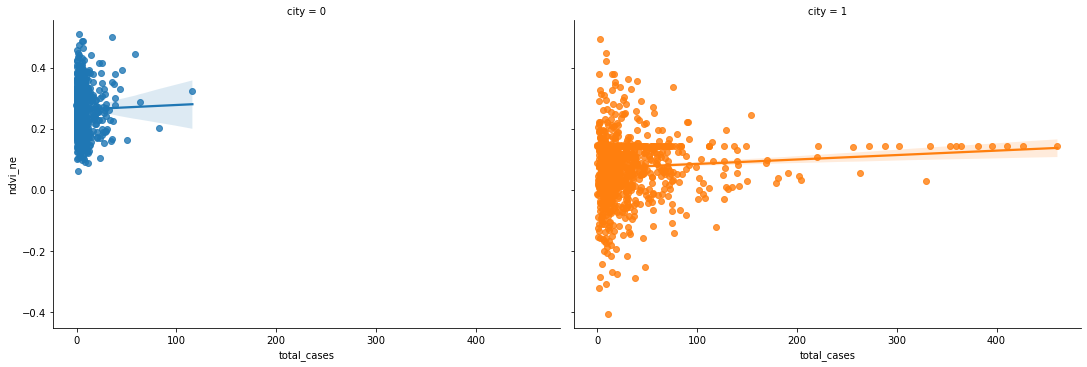

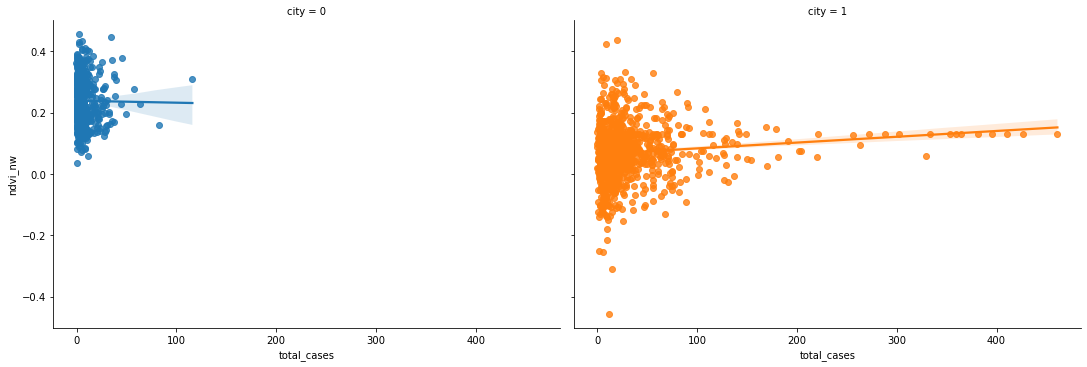

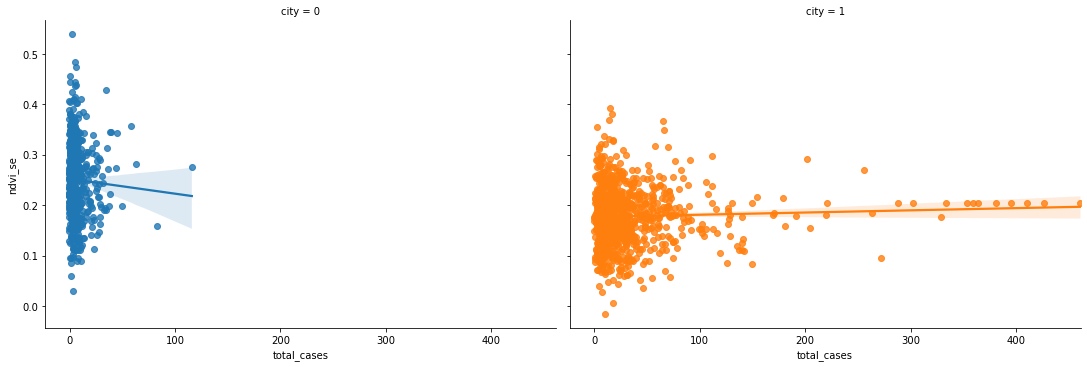

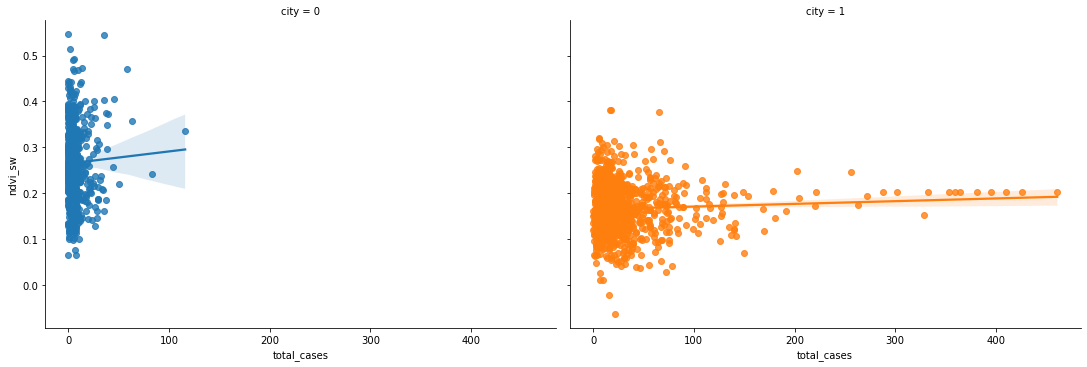

In [17]:
sns.lmplot(x='total_cases', y='ndvi_ne', data=train_features, markers='o', col='city', hue='city', aspect=1.5, x_jitter=.1)
sns.lmplot(x='total_cases', y='ndvi_nw', data=train_features, markers='o', col='city', hue='city', aspect=1.5, x_jitter=.1)
sns.lmplot(x='total_cases', y='ndvi_se', data=train_features, markers='o', col='city', hue='city', aspect=1.5, x_jitter=.1)
sns.lmplot(x='total_cases', y='ndvi_sw', data=train_features, markers='o', col='city', hue='city', aspect=1.5, x_jitter=.1)

From the above plots, we see some interesting differences amongst the 2 cities. First of all, the number of cases in city `iq` is way lower than city `sj`. The correlation line is relatively mild for `sj`, whilst the trend in `iq` is more intense. For instance, for `ndvi_ve`, the trend is clearly downward for `iq`; whilst the corrlation line for `sj` shows no correlation (ish)

### Total cases against the temperature

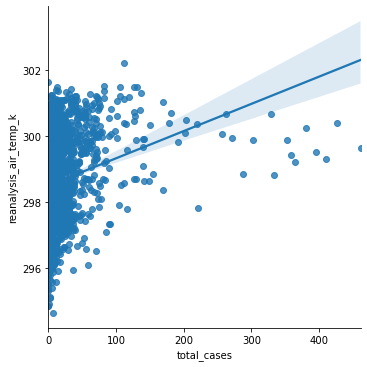

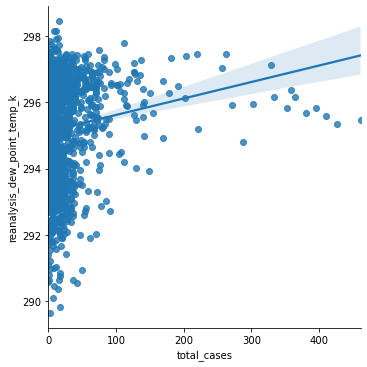

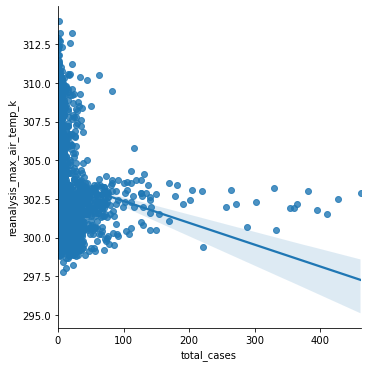

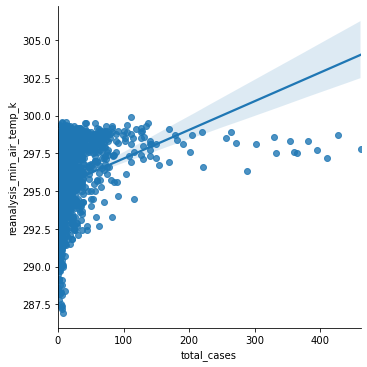

In [18]:
sns.lmplot(x='total_cases', y='reanalysis_air_temp_k', data=train_features, markers='o')
sns.lmplot(x='total_cases', y='reanalysis_dew_point_temp_k', data=train_features, markers='o')
sns.lmplot(x='total_cases', y='reanalysis_max_air_temp_k', data=train_features, markers='o')
sns.lmplot(x='total_cases', y='reanalysis_min_air_temp_k', data=train_features, markers='o')

it seems like the temperature increase affects bad of the cases frequency: the higher temp is the lower the disease cases(look at the graph with max_air_temp). As we see on the first graph, the more mean air temperature, the higher becomes the disease cases. It works the same for dew_point_temp(graph2) and min_air_temp(graph4)

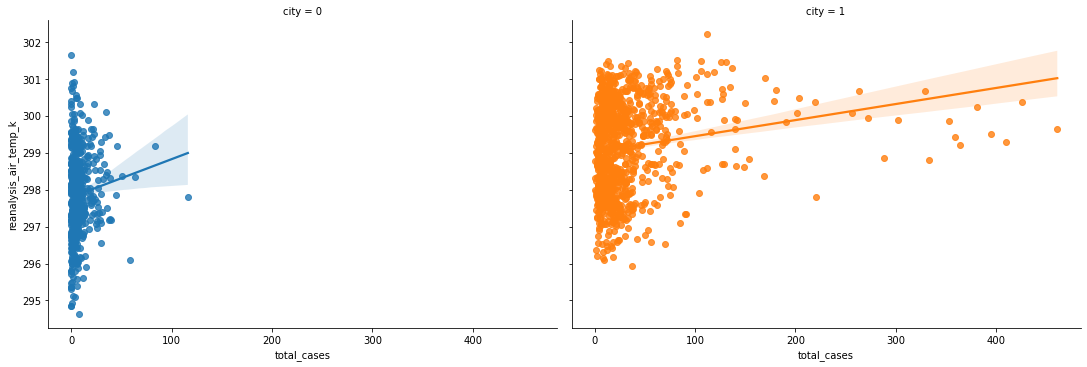

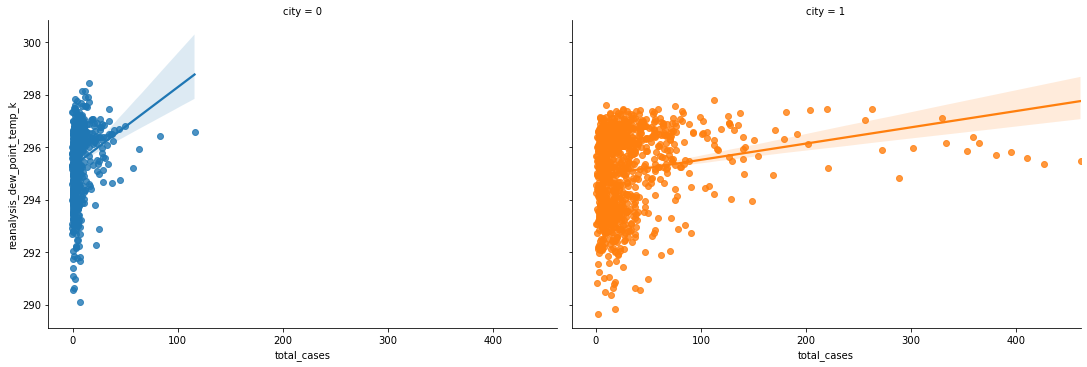

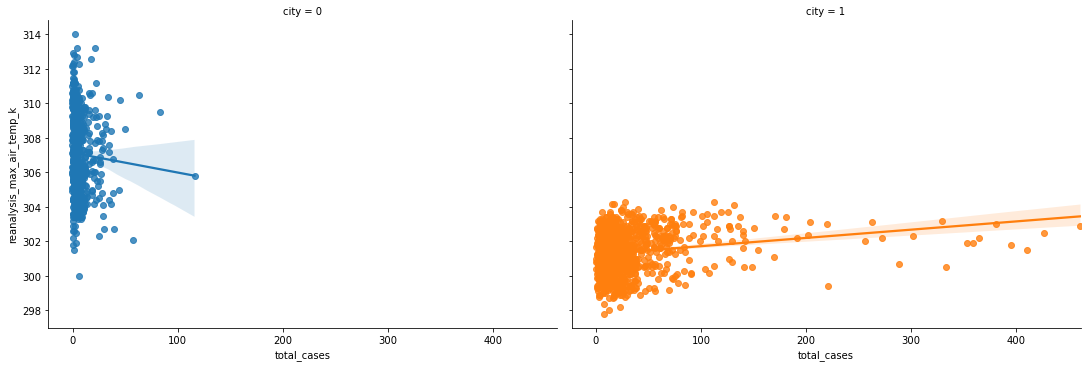

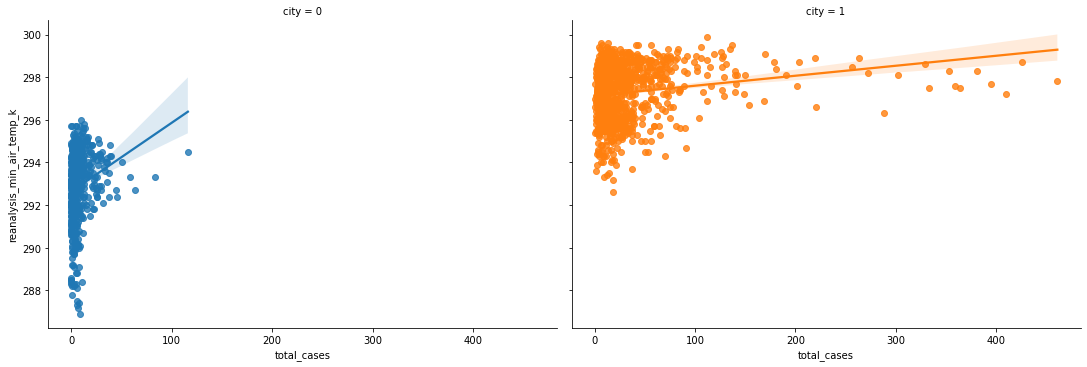

In [19]:
sns.lmplot(x='total_cases', y='reanalysis_air_temp_k', data=train_features, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
sns.lmplot(x='total_cases', y='reanalysis_dew_point_temp_k', data=train_features, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
sns.lmplot(x='total_cases', y='reanalysis_max_air_temp_k', data=train_features, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
sns.lmplot(x='total_cases', y='reanalysis_min_air_temp_k', data=train_features, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)

However as we can see on a graphs above, the dependency of disease cases in accordance with a city differs from graphs without cities. Now as you can see the number of cases is increasing with increasing mean temperature in city 1(iq) and 2(js). However the slope for for city1 with increase of min_temp is small whereas the slope for city0 is much more better. The slopes for both cities against increasing max_air_temp are steep, but for city1(with more cases) it seems like the number of diseases increase even with increase of max_air_temp. We guess that it may happen because of prevailed amount of diseases in that city1. 

### Total cases against humidity level

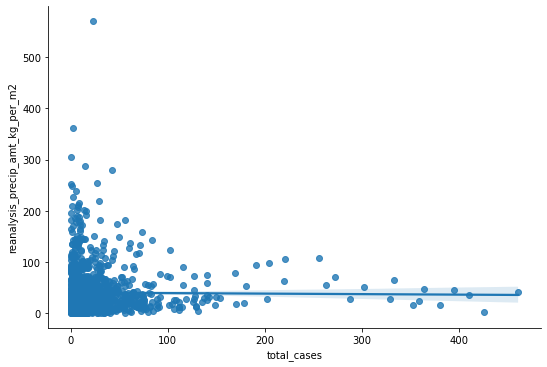

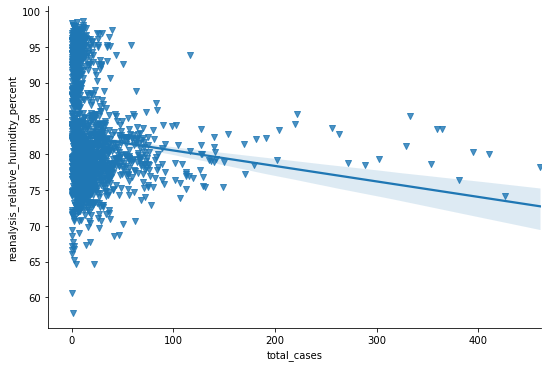

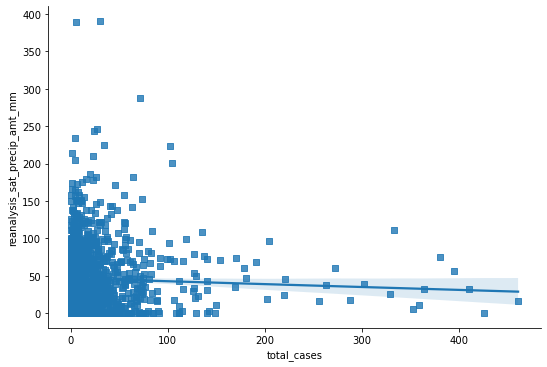

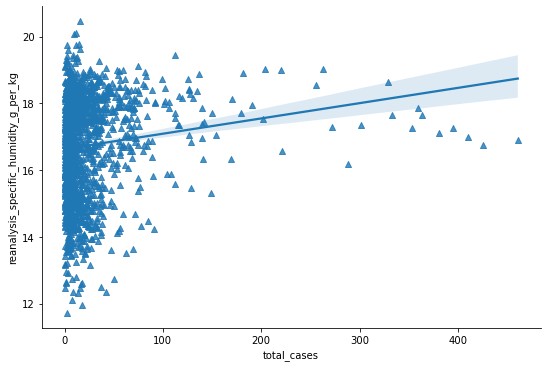

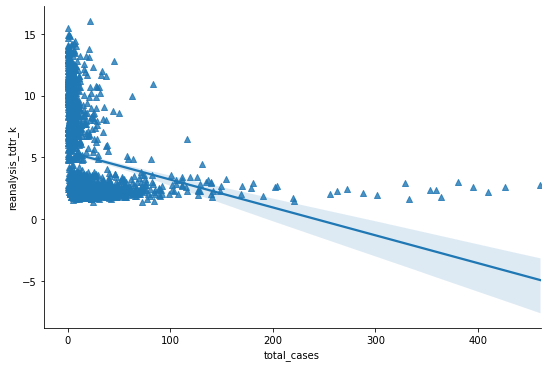

In [20]:
sns.lmplot(x='total_cases', y='reanalysis_precip_amt_kg_per_m2', data=train_features, markers='o', aspect=1.5, x_jitter=.1)
sns.lmplot(x='total_cases', y='reanalysis_relative_humidity_percent', data=train_features, markers='v', aspect=1.5, x_jitter=.1)
sns.lmplot(x='total_cases', y='reanalysis_sat_precip_amt_mm', data=train_features, markers='s', aspect=1.5, x_jitter=.1)
sns.lmplot(x='total_cases', y='reanalysis_specific_humidity_g_per_kg', data=train_features, markers='^',aspect=1.5, x_jitter=.1)
sns.lmplot(x='total_cases', y='reanalysis_tdtr_k', data=train_features, markers='^', aspect=1.5, x_jitter=.1)

it can be observed that specific and relative humidities change affects differently on diseases number: when increases the specific humidity, the total_case increases too, but it works vice versa for relative humidity. Also it is clear that Diurnal temperature range decreases the total_cases. 

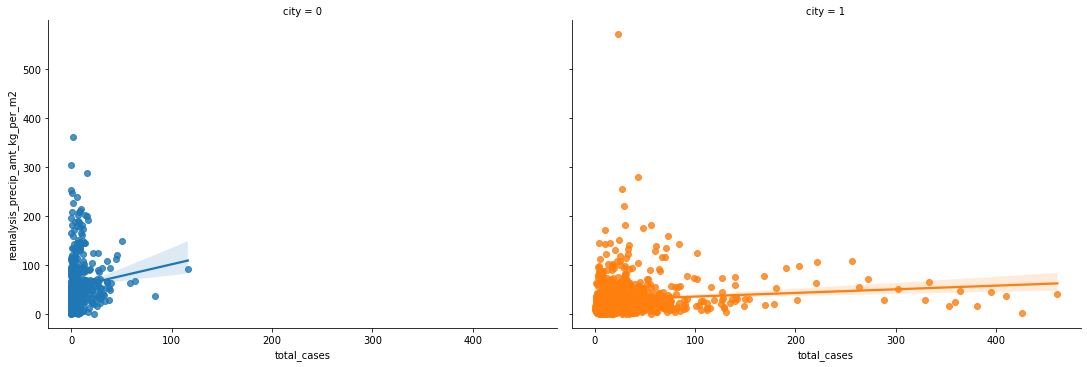

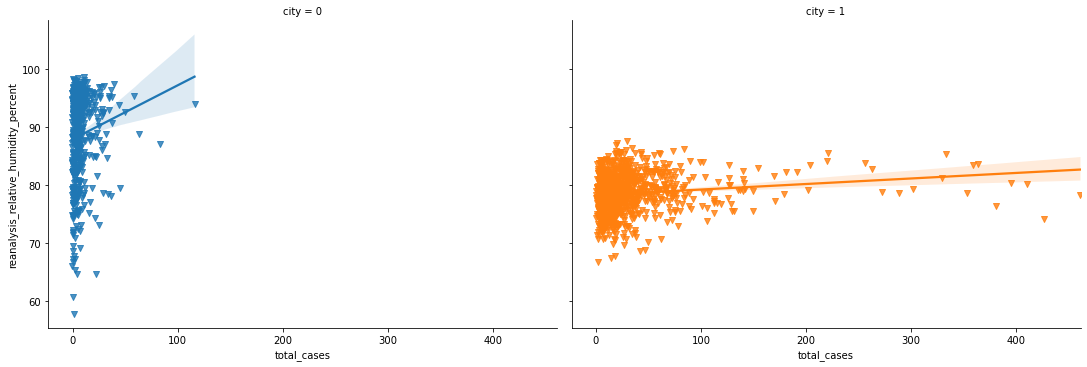

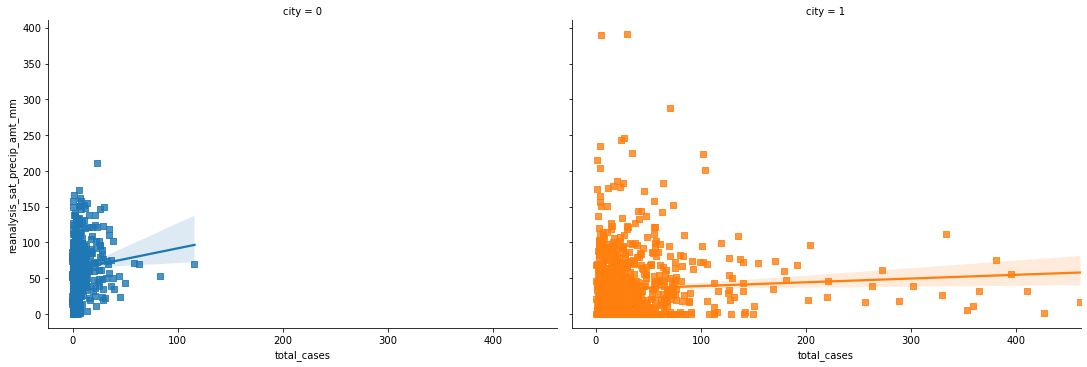

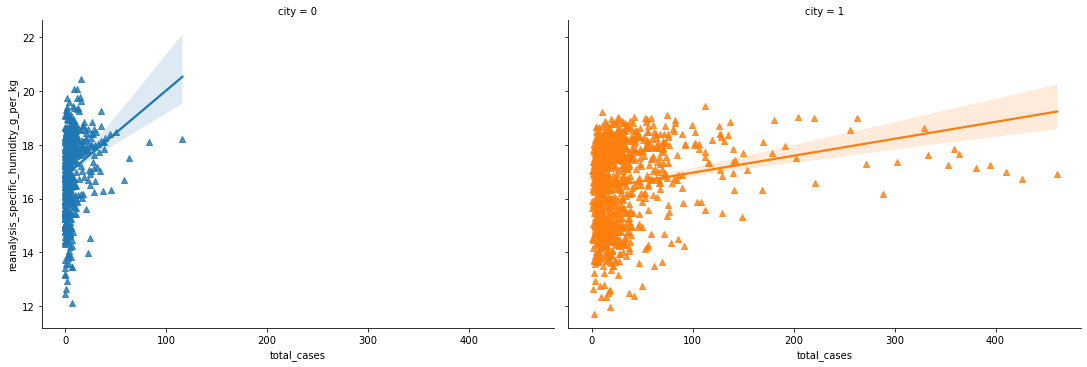

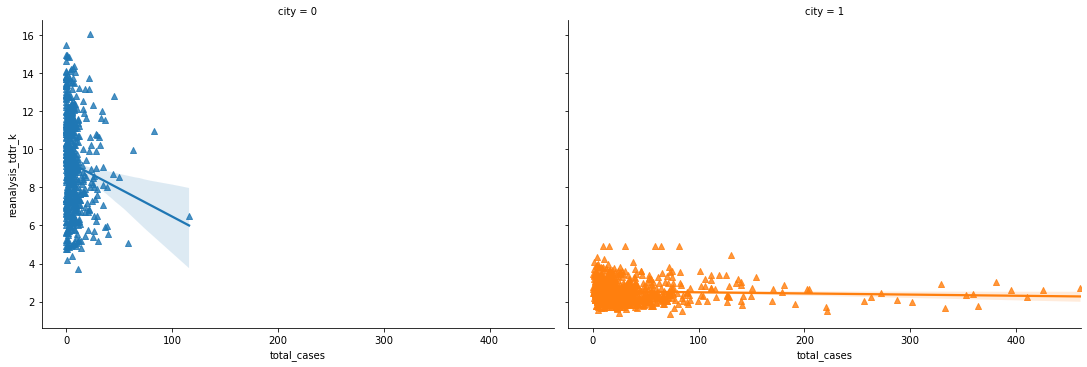

In [21]:
sns.lmplot(x='total_cases', y='reanalysis_precip_amt_kg_per_m2', data=train_features, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
sns.lmplot(x='total_cases', y='reanalysis_relative_humidity_percent', data=train_features, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
sns.lmplot(x='total_cases', y='reanalysis_sat_precip_amt_mm', data=train_features, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
sns.lmplot(x='total_cases', y='reanalysis_specific_humidity_g_per_kg', data=train_features, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)
sns.lmplot(x='total_cases', y='reanalysis_tdtr_k', data=train_features, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)

It can be noted that the tendency for city0 has a good slope but again(especially in the last graph), this sharpness in compare with city1 could be caused by non-smooth data distribution and their small amount. In general, the dependencies of varieties of temperature on a number of diseases are somehow affected by the city: there is a relative humidity percent growth for both city. Diurnal temperature range for city1 do not impact to the total_cases.

### Cases per year

Now let's find a tendency of how the number of diseases behave during 1990-2010. 

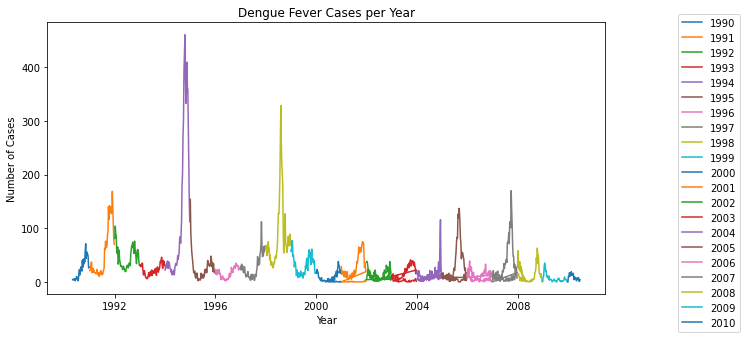

In [22]:
import numpy as np

fig,ax = plt.subplots(figsize=(10,5))
for i in np.unique(train_features['week_start_date'].dt.year.values):
    plt.plot(train_features[train_features['week_start_date'].dt.year==i].week_start_date.T,train_features[train_features['week_start_date'].dt.year==i].total_cases,label='%d'%(i));
    plt.legend();
    plt.title('Dengue Fever Cases per Year');
    plt.xlabel('Year')
    plt.ylabel('Number of Cases')
    ax.legend(bbox_to_anchor=(1.25, 1.05))

As you can see above, the number of cases in 1994 was the highest one and lowest one in 2009. Maybe it is connected with the imporving quality of medicine in local areas. Also as you can note after a high peak there is a sharp down in 1995. Probably there is an immunity for a dengue disease appeared in a local people.

Text(0.5, 0.98, 'DENGUE ACTUAL CASES')

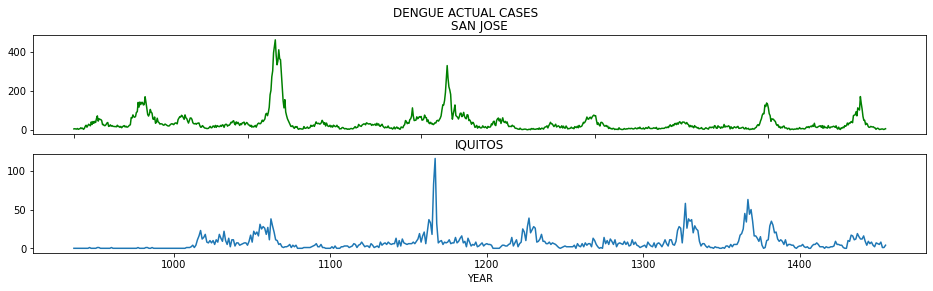

In [23]:
figs, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 4))

ax = train_features[train_features['city'] == 1].total_cases.plot(ax=axes[0], label="San Juan", color='g')
ax.set_title('SAN JOSE')
ax.set_xticklabels([])
ax.set_xlabel("")

# plot iq
ax1 = train_features[train_features['city'] == 0].total_cases.plot(ax=axes[1], label="Iquitos")
ax1.set_title('IQUITOS')
ax1.set_xlabel("YEAR")

plt.suptitle("DENGUE ACTUAL CASES")

The graphs show that the tendency of cases in both cities are a bit similar, however the number of cases per year are sharply different: in San Jose it is 4 times higher and the peak number of cases were observed approximately in 1070 year, while the peak number of cases for city IQUITOS was in ~1160.

In [24]:
train_features.drop('total_cases', 1, inplace=True)

## Features Importance

So now we will standardize features by removing the mean and scaling to unit variance.  We will use Standard scaler for that purpose(we used def apply_scaler). We use it to analize features, to understand which features can be dropped before fitting.


In [25]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [26]:
import pandas as pd
from sklearn import preprocessing

def apply_scaler(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(df)

    norm_features_df = pd.DataFrame(min_max_scaler.transform(df), index=df.index, columns=df.columns)
    norm_features_df.head()

    return norm_features_df

time_cols = ['year', 'week_start_date', 'weekofyear']
norm_features_df = apply_scaler(train_features.drop(time_cols, 1))
norm_features_df.head()

,city,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1.0,0.578226,0.614835,0.386418,0.395544,0.388291,0.354667,0.314680,0.123457,0.692308,0.056091,0.381614,0.031797,0.262659,0.086660,0.430091,0.210393,0.174194,0.486239,0.029450
1,1.0,0.629943,0.657063,0.321190,0.359233,0.472710,0.441778,0.489213,0.191358,0.730769,0.031446,0.479668,0.058423,0.418164,0.069133,0.565350,0.163498,0.322581,0.688073,0.015829
2,1.0,0.479441,0.690881,0.311879,0.384430,0.548064,0.496000,0.657583,0.166667,0.800000,0.045749,0.594415,0.088428,0.586900,0.064265,0.565350,0.173638,0.354839,0.743119,0.076201
3,1.0,0.584823,0.770066,0.438912,0.491150,0.575260,0.539556,0.643471,0.222222,0.776923,0.024365,0.552387,0.039324,0.566808,0.073028,0.645897,0.198986,0.425806,0.788991,0.007362
4,1.0,0.658698,0.788882,0.481601,0.509943,0.645515,0.593778,0.701541,0.253086,0.815385,0.021385,0.555396,0.019252,0.628226,0.112950,0.802432,0.429658,0.535484,0.844037,0.010676


Then we choose the best features for extracting best features of given dataset. The SelectKBest method selects the features according to the k highest score. Selecting best features is important process when we prepare a large dataset for training. It helps us to eliminate less important part of the data and reduce a training time.
Three benefits of performing feature selection before modeling our data are:
Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
Improves Accuracy: Less misleading data means modeling accuracy improves.
Reduces Training Time: Less data means that algorithms train faster.

In [27]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(norm_features_df,labels)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(norm_features_df.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
top10_features = featureScores.nlargest(15,'Score')
print(top10_features)  #print 10 best features

                                   Specs       Score
0                                   city  176.432387
14                     reanalysis_tdtr_k  119.179922
16               station_diur_temp_rng_c   43.331075
8              reanalysis_max_air_temp_k   42.999482
9              reanalysis_min_air_temp_k   29.876255
5                  reanalysis_air_temp_k   18.541845
12          reanalysis_sat_precip_amt_mm   16.149352
4                                ndvi_sw   10.699381
18                    station_min_temp_c    9.890016
3                                ndvi_se    9.501651
19                     station_precip_mm    9.390242
1                                ndvi_ne    9.258279
17                    station_max_temp_c    9.127017
11  reanalysis_relative_humidity_percent    7.957553
6                  reanalysis_avg_temp_k    7.556995


With our analysis (sns plots), most of the features we analyzed ended up to be chose as an important feature by `SelectKBest`

In [28]:
top10 = top10_features['Specs']
print(list(top10))

['city', 'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_air_temp_k', 'reanalysis_sat_precip_amt_mm', 'ndvi_sw', 'station_min_temp_c', 'ndvi_se', 'station_precip_mm', 'ndvi_ne', 'station_max_temp_c', 'reanalysis_relative_humidity_percent', 'reanalysis_avg_temp_k']


In [29]:
top10 = list(top10)

In [30]:
best_train_features = train_features[top10]
best_train_features.head()

,city,reanalysis_tdtr_k,station_diur_temp_rng_c,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_air_temp_k,reanalysis_sat_precip_amt_mm,ndvi_sw,station_min_temp_c,ndvi_se,station_precip_mm,ndvi_ne,station_max_temp_c,reanalysis_relative_humidity_percent,reanalysis_avg_temp_k
0,1,2.628571,6.900000,299.8,295.9,297.572857,12.42,0.177617,20.0,0.198483,16.0,0.122600,29.4,73.365714,297.742857
1,1,2.371429,6.371429,300.9,296.4,298.211429,22.82,0.155486,22.2,0.162357,8.6,0.169900,31.7,77.368571,298.442857
2,1,2.300000,6.485714,300.5,297.3,298.781429,34.54,0.170843,22.8,0.157200,41.4,0.032250,32.2,82.052857,298.878571
3,1,2.428571,6.771429,301.4,297.0,298.987143,15.36,0.235886,23.3,0.227557,4.0,0.128633,33.3,80.337143,299.228571
4,1,3.014286,9.371429,301.9,297.5,299.518571,7.52,0.247340,23.9,0.251200,5.8,0.196200,35.0,80.460000,299.664286


## Experiments with Models

### Splitting with `TimeSeriesSplit` 

As we have finished preprocessing data in the previous chapter, standartized it and prepared for further training, we may start applying various methods to train our data. First we will use TimeSeriesSplit. The function splits training data into multiple segments. We use the first segment to train the model with a set of hyper-parameter, to test it with the second. Then we train the model with first two chunks and measure it with the third part of the data. Then, we will test various machine learning algorithms on data, find mean squared error for each way of solution and select the most accurate one. 

In [31]:
from sklearn.model_selection import TimeSeriesSplit 

tscv = TimeSeriesSplit(n_splits=5)
time_splits = tscv.split(best_train_features)

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [33]:
linear_reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
decision_tree = DecisionTreeRegressor()
knearest = KNeighborsRegressor()
random_forest = RandomForestRegressor()
logreg = LogisticRegression()
svr = SVR()

clfs = [linear_reg, logreg, ridge, lasso, decision_tree, knearest, random_forest, svr]
scores = {'LinearRegression' :[], 
            'LogisticRegression' : [],
            'Ridge' : [], 
            'Lasso' : [],
            'DecisionTreeRegressor' : [], 
            'KNeighborsRegressor' : [], 
            'RandomForestRegressor' : [],
            'SVR' : []}

In [34]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error

for train_index, test_index in time_splits:
    X_train, X_test = best_train_features.iloc[train_index, :], best_train_features.iloc[test_index,:]
    y_train, y_test = labels[train_index], labels[test_index]

    for clf in clfs:
        clf_name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        acc = mean_absolute_error(y_test, clf.predict(X_test))
        scores[clf_name].append(acc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [35]:
# calculate the avg from cross val process
avg_scores = {}

for k, v in scores.items():
    avg_score = sum(v)/len(v)
    avg_scores[k] = avg_score

sorted_avg_scores = {k: v for k, v in sorted(avg_scores.items(), key=lambda item: item[1])}
print(sorted_avg_scores)

{'LogisticRegression': 15.13388429752066, 'SVR': 17.144576772889803, 'Lasso': 24.74862739957426, 'Ridge': 25.992284349950733, 'LinearRegression': 26.810001921378962, 'RandomForestRegressor': 28.831707920110194, 'KNeighborsRegressor': 29.356198347107437, 'DecisionTreeRegressor': 33.412809917355375}


## Finetuning the top 3 best Raw Regressor

We have found that the top3 lowest MSE belong to SVR(17.14), Lasso(24.748) and LogisticRegression(15.13). Let's make mse of these models lower i.e. make these algorithms better by using gridsearch. GridSearchCV is a very powerful tool for automatically fitting parameters for machine learning models. GridSearchCV finds the best parameters by simple iteration: it creates a model for every possible combination of parameters. It is important to note that this approach can be very time consuming.

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

def perform_grid_search(clf, param):
    grid = GridSearchCV(clf, param, cv=tscv, n_jobs = -1, verbose=True, scoring='neg_mean_absolute_error')
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    print(grid.best_estimator_)
    print(grid.best_score_)  

In [37]:
beast1_clf = Lasso()
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
perform_grid_search(beast1_clf, lasso_params)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'alpha': 0.03}
Lasso(alpha=0.03)
-29.854916821053926


In [38]:
beast2_clf = SVR()
svr_param = {"C": [1e0, 1e1, 1e2, 1e3],"gamma": np.logspace(-2, 2, 5)}
perform_grid_search(beast2_clf, svr_param)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'C': 10.0, 'gamma': 0.01}
SVR(C=10.0, gamma=0.01)
-22.701012094386257


In [39]:
beast3_clf = LogisticRegression()
logreg_params = {
    'C': np.logspace(-2,2,7),
    'penalty': ['l2', 'l1'],
}
perform_grid_search(beast3_clf, logreg_params)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-21.32475248          nan -21.60792079          nan -21.47227723
          nan -21.45544554          nan -21.4019802           nan
 -21.71485149          nan -21.66831683          nan]
  warnings.warn(


{'C': 0.01, 'penalty': 'l2'}
LogisticRegression(C=0.01)
-21.32475247524752


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Training with our tuned best Model

so as we have found above, the grid best scores belong to logistic regression and svr. Let's find their mse usingtheir best estimators/parameters found by gridsearch. 

In [40]:
beast1 = LogisticRegression(C=0.01, penalty='l2')

beast1.fit(X_train, y_train)
y_pred = beast1.predict(X_test)
mae_loss = mean_absolute_error(y_test, y_pred)
print(mae_loss)

8.987603305785123


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
beast2 = SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

beast2.fit(X_train, y_train)
y_pred = beast2.predict(X_test)
mae_loss = mean_absolute_error(y_test, y_pred)
print(mae_loss)

7.48855448576518


## Best MAE score: 7.48

So the SVR gave us the lowest MAE. 
Let's plot the result of predicted one and the actual one of total_cases and see how they are fitting each other. 

Plotting out residual

<AxesSubplot:xlabel='total_cases', ylabel='total_cases'>

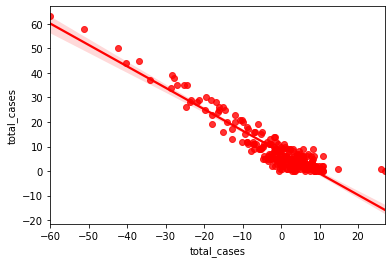

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

residual = y_pred - y_test
sns.regplot(x = residual, y = y_test, data = None, scatter = True, color = 'red')

## Writing our result to output.csv

In [43]:
result_df = pd.read_csv('submission_format.csv')
result_df.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,0
1,sj,2008,19,0
2,sj,2008,20,0
3,sj,2008,21,0
4,sj,2008,22,0


In [44]:
# getting preds for test features
best_test_features = test_features[top10]
preds = beast2.predict(best_test_features)
result_df['total_cases'] = preds
result_df['total_cases'] = result_df['total_cases'].astype(int)

In [45]:
result_df.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,16
1,sj,2008,19,15
2,sj,2008,20,11
3,sj,2008,21,7
4,sj,2008,22,12


In [46]:
result_df.to_csv('./output.csv') 